In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/SOCR-HeightWeight.csv')
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [ ]:
df.shape

(25000, 3)

In [ ]:
df.isna().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [ ]:
df.describe

<bound method NDFrame.describe of        Index  Height(Inches)  Weight(Pounds)
0          1        65.78331        112.9925
1          2        71.51521        136.4873
2          3        69.39874        153.0269
3          4        68.21660        142.3354
4          5        67.78781        144.2971
...      ...             ...             ...
24995  24996        69.50215        118.0312
24996  24997        64.54826        120.1932
24997  24998        64.69855        118.2655
24998  24999        67.52918        132.2682
24999  25000        68.87761        124.8742

[25000 rows x 3 columns]>

In [ ]:
df.drop(['Index'],axis=1,inplace=True)
df

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
x

array([[65.78331],
       [71.51521],
       [69.39874],
       ...,
       [64.69855],
       [67.52918],
       [68.87761]])

In [ ]:
y

array([112.9925, 136.4873, 153.0269, ..., 118.2655, 132.2682, 124.8742])

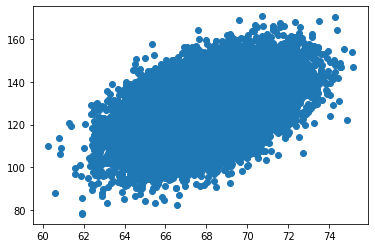

In [ ]:
plt.scatter(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
x_train

array([[69.51352],
       [65.01631],
       [67.06874],
       ...,
       [66.21022],
       [65.25058],
       [67.27951]])

In [ ]:
y_train

array([143.2796, 106.8729, 123.2887, ..., 116.362 , 127.0436, 132.9248])

In [ ]:
#model creation
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
y_pred

array([132.19630264, 122.53871358, 125.09203016, ..., 125.83810113,
       124.0791552 , 120.30145616])

Text(0, 0.5, 'Weight')

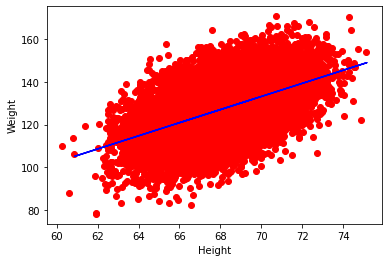

In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')

In [ ]:
print('Coeffience or slope',reg.coef_)
print('intercept',reg.intercept_)

Coeffience or slope [3.08230109]
intercept -82.54379211301277


In [ ]:
predict_df=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred})
predict_df


,Actual_value,Predicted_value
0,126.5893,132.196303
1,138.7161,122.538714
2,124.0105,125.092030
3,138.6052,129.189765
4,134.4170,125.299870
...,...,...
4995,108.4437,123.020878
4996,132.7352,128.543807
4997,121.1687,125.838101
4998,127.6698,124.079155


In [ ]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
print("Mean Absolute Error is ",mean_absolute_error(y_test,y_pred))
print("Error Percentage ",mean_absolute_percentage_error(y_test,y_pred))

Mean Absolute Error is  7.992415830591776
Error Percentage  0.06364888041188978


In [ ]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 99.74259398052973


In [ ]:
#Root Mean Squared Error
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error 9.987121406117467
